In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
from pymongo import MongoClient

# Connect to the MongoDB server
client = MongoClient('mongodb://localhost:27017/')  # Replace with your MongoDB URI if needed

# Access the database and collection
db = client['Zashion']
collection = db['Posts']

# Fetch all documents from the collection
data = list(collection.find())

# Convert to a pandas DataFrame
df = pd.DataFrame(data)

# Drop the MongoDB `_id` field if it exists
if '_id' in df.columns:
    df = df.drop(columns=['_id'])

# Display the first few rows
print(df.head())


    Creator Name     Product Name    Category  Pattern Colour  Likes
0  Alice Johnson     Floral Dress     Dresses   Floral    Red    245
1      Bob Smith     Denim Jacket   Outerwear    Solid   Blue    320
2  Alice Johnson    Leather Boots    Footwear    Solid  Black    178
3  Charlie Brown  Graphic T-shirt        Tops  Graphic  White    412
4   Diana Taylor    Pleated Skirt  Bottomwear  Striped  Green    134


In [5]:

print(data.info())  # Check data types
print(data.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Creator Name  326 non-null    object
 1   Product Name  326 non-null    object
 2   Category      326 non-null    object
 3   Pattern       326 non-null    object
 4   Colour        326 non-null    object
 5   Likes         326 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 15.4+ KB
None
            Likes
count  326.000000
mean   243.064417
std     74.226175
min     76.000000
25%    210.000000
50%    230.000000
75%    260.000000
max    523.000000


In [6]:
print(data.isnull().sum())  # Check for missing values
data = data.drop_duplicates()  # Remove duplicates


Creator Name    0
Product Name    0
Category        0
Pattern         0
Colour          0
Likes           0
dtype: int64


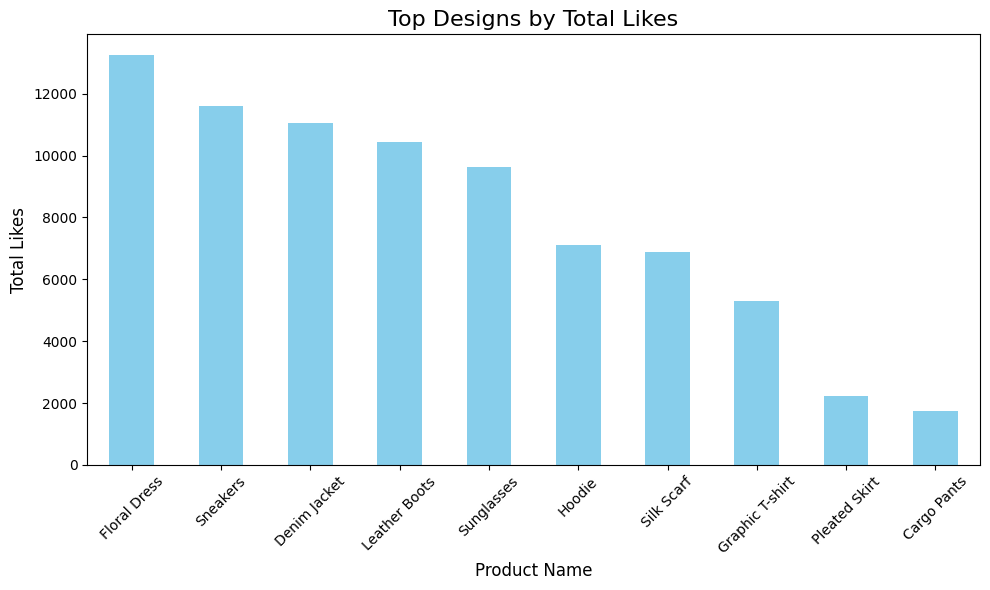

In [7]:
top_designs = data.groupby('Product Name')['Likes'].sum().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
top_designs.plot(kind='bar', color='skyblue')
plt.title('Top Designs by Total Likes', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Likes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
data_encoded = pd.get_dummies(data, columns=['Category', 'Pattern', 'Colour', 'Product Name', 'Creator Name'], drop_first=True)


In [9]:
X = data_encoded.drop('Likes', axis=1)
y = data_encoded['Likes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)


In [11]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [12]:
print("Linear Regression:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_linear)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_linear)}")

print("\nRandom Forest Regressor:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")


Linear Regression:
Mean Squared Error: 9340.671806673723
R^2 Score: -0.30774826024053525

Random Forest Regressor:
Mean Squared Error: 7219.723828451178
R^2 Score: -0.010803234659025662


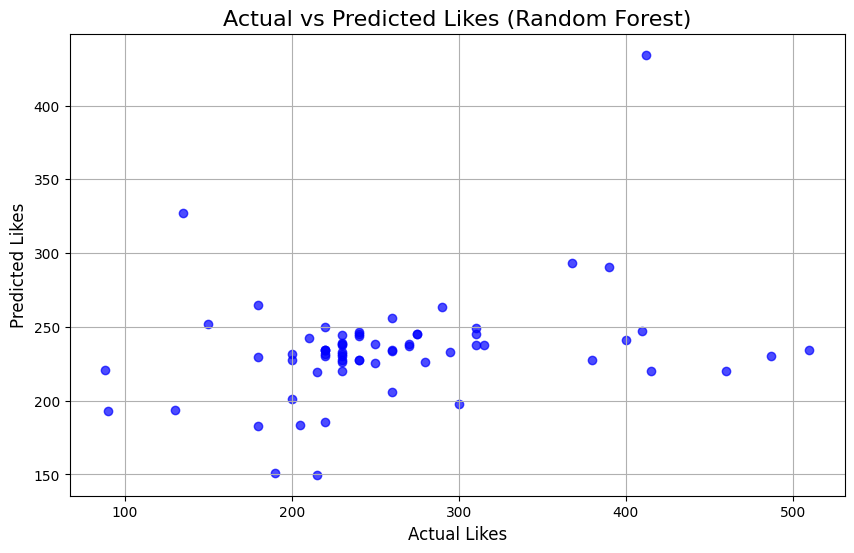

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='blue')
plt.title('Actual vs Predicted Likes (Random Forest)', fontsize=16)
plt.xlabel('Actual Likes', fontsize=12)
plt.ylabel('Predicted Likes', fontsize=12)
plt.grid(True)
plt.show()
